<a href="https://colab.research.google.com/github/ChintzRuparel/Machine-Learning-Optimisation-Algorithms/blob/main/Digit_Recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Competition Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

## Import Libraries


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

2.9.2


## Importing Data 


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('sample_submission.csv')
print(train.shape, test.shape,ss.shape)

(4584, 785) (4592, 784) (28000, 2)


## Data analysis

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Columns: 785 entries, label to pixel783
dtypes: float64(431), int64(354)
memory usage: 27.5 MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4592 entries, 0 to 4591
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(224), int64(560)
memory usage: 27.5 MB


In [10]:
train.isna().any().sum()

431

In [11]:
train.isna().any().sum()

431

## 

In [12]:
X_train = train.drop('label',axis=1)
Y_train = train['label']
X_test = test

In [13]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()

In [14]:
X_train=X_train.reshape((len(X_train),28,28))
X_test=X_test.reshape((len(X_test),28,28))
print(X_train.shape, X_test.shape)

(4584, 28, 28) (4592, 28, 28)



##### 000 001 002 003 ... 026 027
##### 028 029 030 031 ... 054 055
##### 056 057 058 059 ... 082 083
#####  |   |   |   |  ...  |   |
##### 728 729 730 731 ... 754 755
##### 756 757 758 759 ... 782 783  

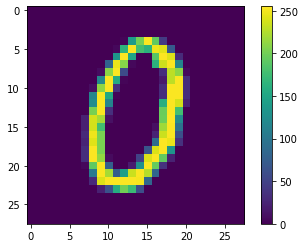

In [15]:
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
X_train, X_test=X_train/255.0, X_test/255.0

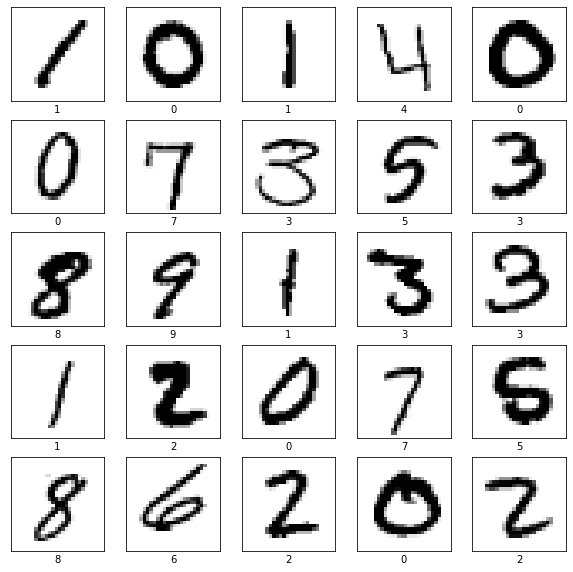

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()

## Modeling

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
144/144 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1165
Epoch 2/10
144/144 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1008
Epoch 3/10
144/144 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1008
Epoch 4/10
144/144 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1008
Epoch 5/10
144/144 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1008
Epoch 6/10
144/144 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1008
Epoch 7/10
144/144 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1008
Epoch 8/10
144/144 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1008
Epoch 9/10
144/144 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1008
Epoch 10/10
144/144 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1008


In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
Y_pred = probability_model.predict(X_test)

144/144 [==============================] - 0s 3ms/step


In [23]:
Y_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [24]:
Y_pred=np.argmax(Y_pred,axis=1)

In [25]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
Y_pred.shape

(4592,)

## Submission

In [27]:
output=pd.DataFrame({'ImageId':test.index+1,'Label':Y_pred})
output.to_csv('submission.csv',index=False)